**ESTUDIANTE:** CÉSAR EMILIO GARCÍA ÁVALOS

**ACTIVIDAD:** M2_AI1_Precio gasolina



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Ruta al archivo CSV previamente guardado en Github, notar que es el csv proporcionado en la carpeta *datos* ubicada en el aula virtual
ruta_archivo = 'https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/precio_gasolina.csv?_sm_au_=iVV5D345RKPPbJZF26q8vKHV6CTMc'

In [34]:
# Leer el archivo CSV en un DataFrame de Pandas
datos = pd.read_csv(ruta_archivo, sep= ";")
df = pd.DataFrame(datos)

In [35]:
df.info()
'''Saber el número total de observaciones y la cantidad de variables permite conocer una estructura general del dataset,
conocer los tipos de variables con las que se está trabajando, por otra parte, conocer la cantidad de observaciones permite
inferir si se tienen datos suficientes para realizar el cálculo de estadísticos
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Provincia         9991 non-null   object
 1   Localidad         9991 non-null   object
 2   Codigo_postal     9991 non-null   int64 
 3   Direccion         9991 non-null   object
 4   Margen            9991 non-null   object
 5   Toma_de_datos     9991 non-null   object
 6   Precio            9991 non-null   object
 7   Rotulo            9990 non-null   object
 8   Tipo_venta        9991 non-null   object
 9   Rem               9991 non-null   object
 10  Horario           9991 non-null   object
 11  Tipo_servicio     9845 non-null   object
 12  Fecha_extraccion  9991 non-null   object
dtypes: int64(1), object(12)
memory usage: 1014.8+ KB


'Saber el número total de observaciones y la cantidad de variables permite conocer una estructura general del dataset,\nconocer los tipos de variables con las que se está trabajando, por otra parte, conocer la cantidad de observaciones permite\ninferir si se tienen datos suficientes para realizar el cálculo de estadísticos\n'

In [36]:
# Visualizar las primeras filas del DataFrame
df.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,01 08 2020 1353,"0,758",PCAN,P,dm,LD 24H,LD 24H A,01 08 2020
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,01 08 2020 0900,"0,759",OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,01 08 2020
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,27 07 2020 1202,"0,769",GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,01 08 2020
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,29 07 2020 0000,"0,789",TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,01 08 2020
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,27 07 2020 1159,"0,789",GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,01 08 2020


In [37]:
#Se analizan en específico 3 variables para verificar los valores que toman para evaluar si son cualitativas nominales, ordinales o binarias
valores_unicos_margen = df['Margen'].unique()
print(valores_unicos_margen)
valores_unicos_venta = df['Tipo_venta'].unique()
print(valores_unicos_venta)
valores_unicos_rem = df['Rem'].unique()
print(valores_unicos_rem)

['D' 'N' 'I']
['P' 'A' 'R' 'N' 'p']
['dm' 'OM']


In [38]:
'''
TIPOS DE DATOS
*Provincia y Localidad: Ambas representan nombres de ubicaciones geográficas y se clasificarían como variables cualitativas nominales.

*Codigo_postal: Representa códigos postales y, aunque es numérico, se utiliza principalmente como identificador y se clasificaría como una
variable cualitativa nominal.

*Direccion: Representa direcciones completas y se clasificaría como una variable cualitativa nominal.

*Margen: Contiene valores como 'D' (Derecho),'N' (No aplica) e 'I' (Izquierdo), no siguen un orden o jerarquía que sugiere una clasificación
cualitativa nominal.

*Horario, Tipo_servicio: Son variables cualitativas nominales, no se identifica que sigan un orden o jerarquía o que sea una
variable binaria.

*Precio: Contiene valores numéricos que representan precios y se clasificaría como una variable cuantitativa continua.

*Rem: Puede tomar dos valores, datos procedentes de operador mayorista y minorista, es una variable cualitativa binaria.

*Rotulo y Tipo_venta: Son variables cualitativas nominales, no se identifica que sigan un orden o jerarquía o que sea una
variable binaria.

*Toma de datos y fecha extraccion: Ambos son datos temporales, el primero incluye la hora y el segundo es la extraccion de la fecha,
ambas son variables continuas sin embargo para su uso debería de darse un tratamiento de datos previo pues inicialmente son tipo Object
'''

"\nTIPOS DE DATOS\n*Provincia y Localidad: Ambas representan nombres de ubicaciones geográficas y se clasificarían como variables cualitativas nominales.\n\n*Codigo_postal: Representa códigos postales y, aunque es numérico, se utiliza principalmente como identificador y se clasificaría como una\nvariable cualitativa nominal.\n\n*Direccion: Representa direcciones completas y se clasificaría como una variable cualitativa nominal.\n\n*Margen: Contiene valores como 'D' (Derecho),'N' (No aplica) e 'I' (Izquierdo), no siguen un orden o jerarquía que sugiere una clasificación\ncualitativa nominal.\n\n*Horario, Tipo_servicio: Son variables cualitativas nominales, no se identifica que sigan un orden o jerarquía o que sea una\nvariable binaria.\n\n*Precio: Contiene valores numéricos que representan precios y se clasificaría como una variable cuantitativa continua.\n\n*Rem: Puede tomar dos valores, datos procedentes de operador mayorista y minorista, es una variable cualitativa binaria.\n\n*Rotul

Tabla de frecuencias para 'provincia':
                 Provincia  Frecuencia
0                   MADRID         730
1                BARCELONA         723
2                 VALENCIA         568
3                 ALICANTE         408
4                  SEVILLA         385
5                   MURCIA         384
6                   MALAGA         296
7                CORUNA A          257
8                  GRANADA         250
9                    CADIZ         244
10                  GIRONA         243
11                  TOLEDO         235
12             PALMAS LAS          231
13                    JAEN         225
14  SANTA CRUZ DE TENERIFE         223
15               TARRAGONA         212
16                ZARAGOZA         212
17                 BADAJOZ         207
18                ASTURIAS         203
19                 NAVARRA         202
20                 CORDOBA         195
21          BALEARS ILLES          194
22                 ALMERIA         184
23              PONTEVEDR

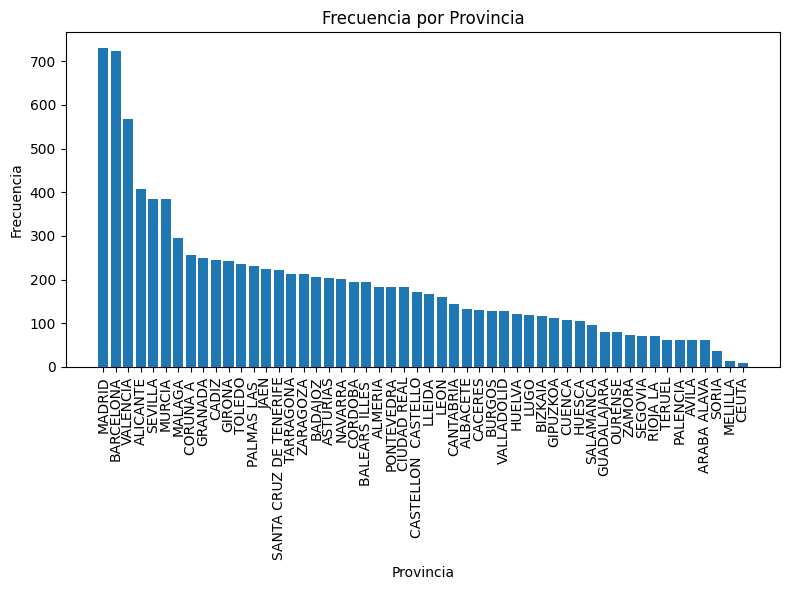

In [39]:
# Tabla de frecuencias para 'provincia'
'''Se coloca reset_index para trabajar con un DataFrame con índices numéricos y
columnas explícitas para los valores únicos y sus recuentos de ocurrencias
'''
tabla_provincia = df['Provincia'].value_counts().reset_index()
#Se renombran las columnas
tabla_provincia.columns = ['Provincia', 'Frecuencia']
print("Tabla de frecuencias para 'provincia':")
print(tabla_provincia)

# Gráfico de barras para 'provincia'
plt.figure(figsize=(8, 6))
plt.bar(tabla_provincia['Provincia'], tabla_provincia['Frecuencia'])
plt.title('Frecuencia por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Tabla de frecuencias para 'margen':
  Margen  Frecuencia
0      D        5016
1      I        2596
2      N        2379


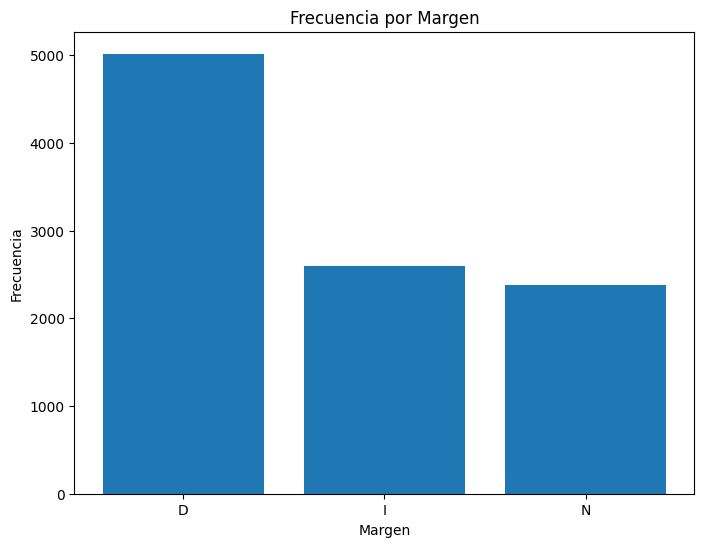

In [40]:
# Tabla de frecuencias para 'margen'
'''Se coloca reset_index para trabajar con un DataFrame con índices numéricos y
columnas explícitas para los valores únicos y sus recuentos de ocurrencias
'''
tabla_margen = df['Margen'].value_counts().reset_index()
tabla_margen.columns = ['Margen', 'Frecuencia']
print("\nTabla de frecuencias para 'margen':")
print(tabla_margen)

# Gráfico de barras para 'margen'
plt.figure(figsize=(8, 6))
plt.bar(tabla_margen['Margen'], tabla_margen['Frecuencia'])
plt.title('Frecuencia por Margen')
plt.xlabel('Margen')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
#Se realiza una conversión de datos para poder realizar una separación por tramos de precio en vista de que es una variable continua
if df['Precio'].dtype == 'float64':
    print("La columna 'Precio' ya es numérica")
else:
    # Convertir la columna 'Precio' a tipo de datos float, con manejo de errores para convertir no numéricos a NaN
    df['Precio'] = pd.to_numeric(df['Precio'].str.replace(',', '.'), errors='coerce')

In [42]:
#Se calcula el tamaño de clases utilizando la regla de Sturges
import numpy as np
def sturges_rule(df):
    n = len(df)  # Longitud del DataFrame, es decir, el número de observaciones
    k = 1 + np.log2(n)
    return int(k)
bins = sturges_rule(df)
print("Número de bins calculados según la regla de Sturges:", bins)

Número de bins calculados según la regla de Sturges: 14


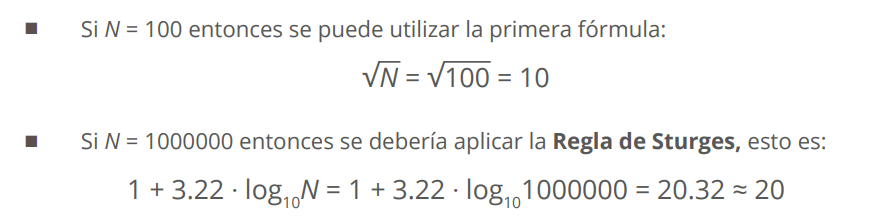

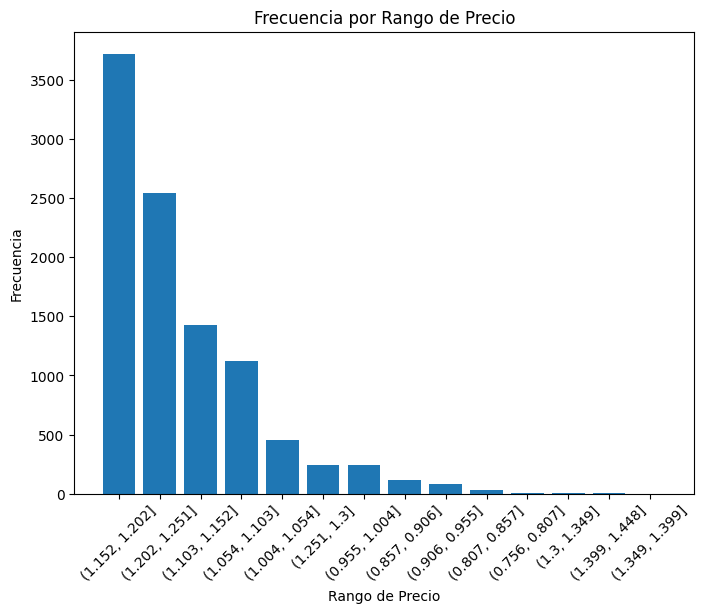

In [43]:
# Crear una nueva columna en el DataFrame con los intervalos de precio considerando 5 clases
df['intervalo_precio'] = pd.cut(df['Precio'], bins=14, include_lowest=True)

# Tabla de frecuencias para 'precio' con intervalos calculados previamente
tabla_precio = df['intervalo_precio'].value_counts().reset_index()
tabla_precio.columns = ['Intervalo de precio', 'Frecuencia']

# Gráfico de barras para 'precio'
plt.figure(figsize=(8, 6))
plt.bar(tabla_precio['Intervalo de precio'].astype(str), tabla_precio['Frecuencia'])
plt.title('Frecuencia por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar los intervalos para que sean legibles
plt.show()